## Business Goal : 
    To build a list of target customers who are likey to subscribe a term deposit. 
    The more targeted our campaigns, the more successful they are likely to be.

## Project Overview : 
We will convert this problem into a machine learning classification problem .
We will build a model to predict whether a client will subscribe a term deposit or not so that the banks can arrange a better management of available resources by focusing on the potential customers “predicted” by the classifier .This will help them to design a more efficient and precise campaign strategy to reduce the costs,improve the profits and customer satisfaction .

## Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

###  Attribute Information:
**Bank client data:**
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**
* Contact: contact communication type (categorical:
  'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   …, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical:
  'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important
  note: this attribute highly affects the output target (e.g., if
  duration=0 then y='no'). Yet, the duration is not known before a call
  is performed. Also, after the end of the call y is obviously known.
  Thus, this input should only be included for benchmark purposes and
  should be discarded if the intention is to have a realistic
  predictive model.

**Other attributes:**
*  Campaign: number of contacts performed during this campaign and for 
   this client (numeric, includes last contact)
*  Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
*  Previous: number of contacts performed before this campaign and for
   this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:
  'failure','nonexistent','success')

**Social and economic context attributes**
* Emp.var.rate: employment variation rate - quarterly indicator, it defines as a measure of the extent to which available labour resources (people available to work) are being used.
  (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric), it expresses the change in the current prices of the market basket in terms of the prices during the same month in the previous year. 
* Cons.conf.idx: consumer confidence index - monthly indicator , CCI is a survey administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation
  (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric), it is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months
* Nr.employed: number of employees - quarterly indicator (numeric)
  
**Output variable (desired target):**
* y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [458]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats  

In [459]:
data=pd.read_csv("bank-additional-full.csv",sep=';')

In [460]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [461]:
data.shape

(41188, 21)

In [462]:
data.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [463]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [464]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [465]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [466]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [467]:
# Remaining 'y' as target
data = data.rename(columns={'y':'target'})

In [468]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [469]:
data.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

# Exploratory Data Analysis

#### -->Target variable "Yes" & "No"

<AxesSubplot:xlabel='target', ylabel='count'>

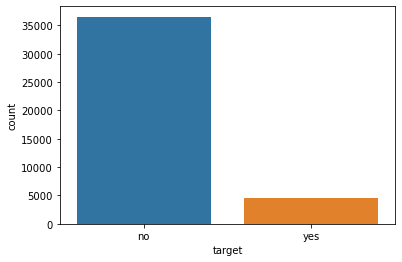

In [470]:
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=data)

### Visualising categorical variable

<AxesSubplot:xlabel='marital', ylabel='count'>

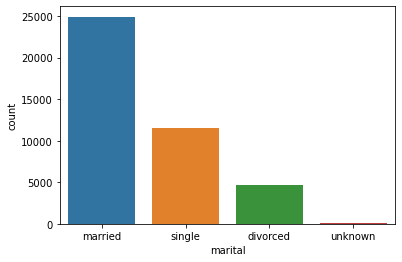

In [471]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital',data=data)

<AxesSubplot:xlabel='job', ylabel='count'>

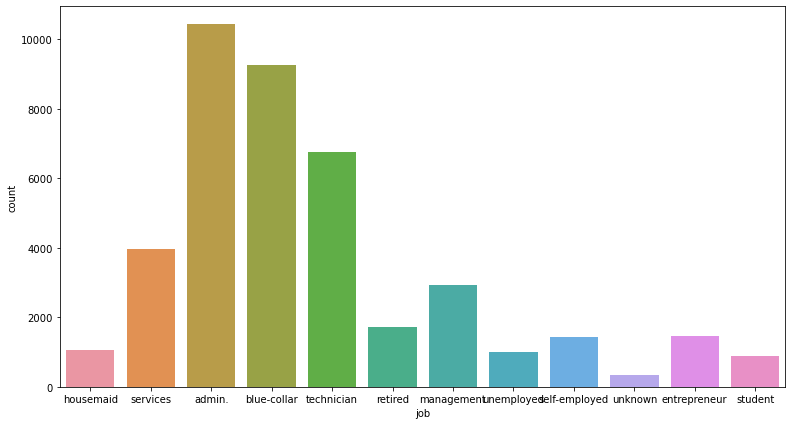

In [472]:
plt.figure(figsize=(13,7))
sns.countplot(x='job',data=data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

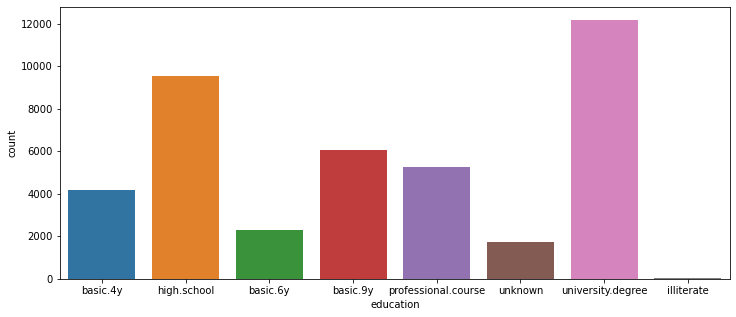

In [473]:
plt.figure(figsize=(12,5))
sns.countplot('education',data = data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

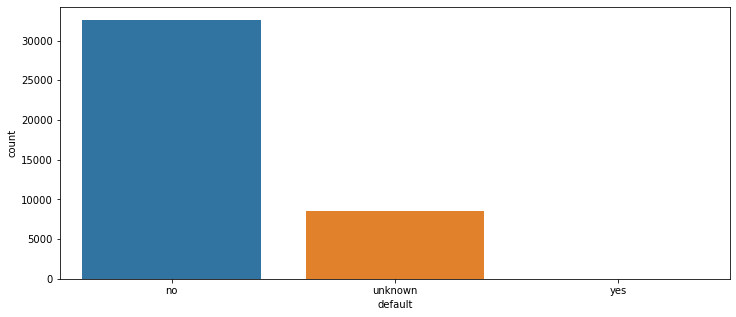

In [474]:
plt.figure(figsize=(12,5))
sns.countplot('default',data = data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

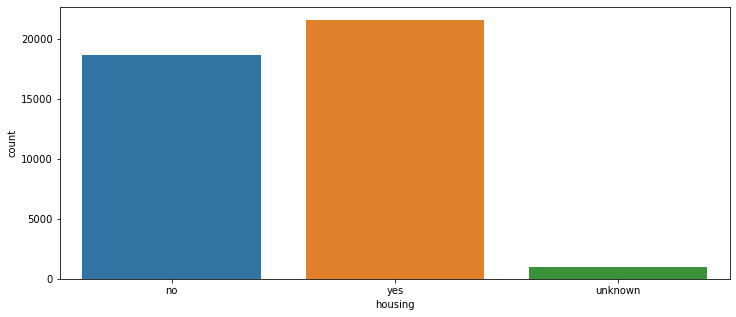

In [475]:
plt.figure(figsize=(12,5))
sns.countplot('housing',data = data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

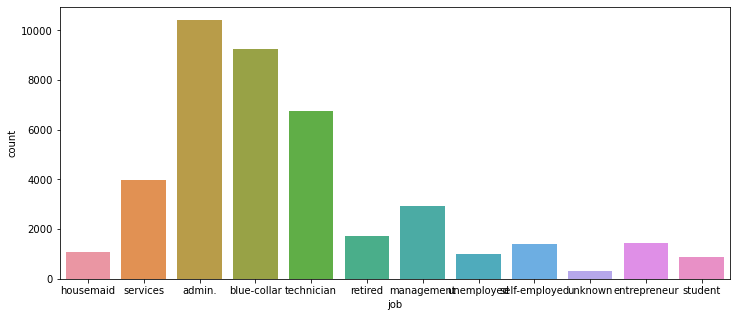

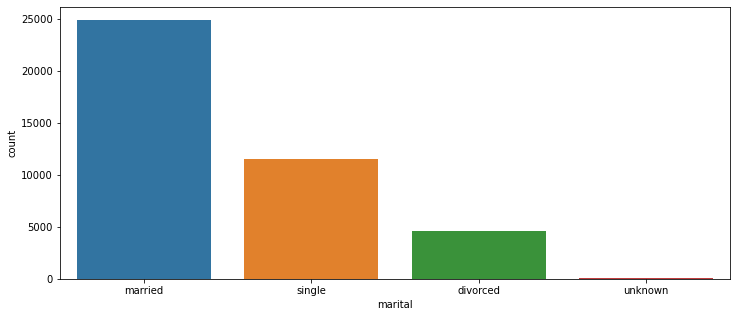

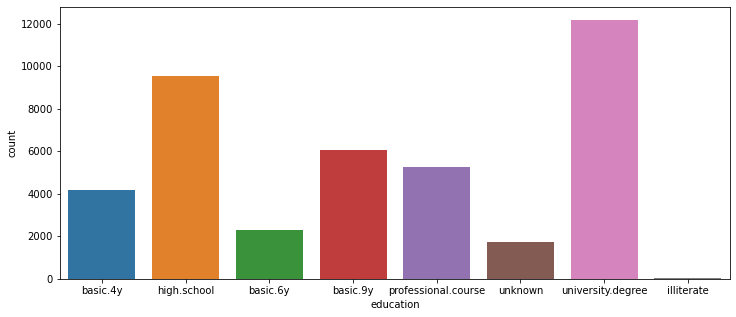

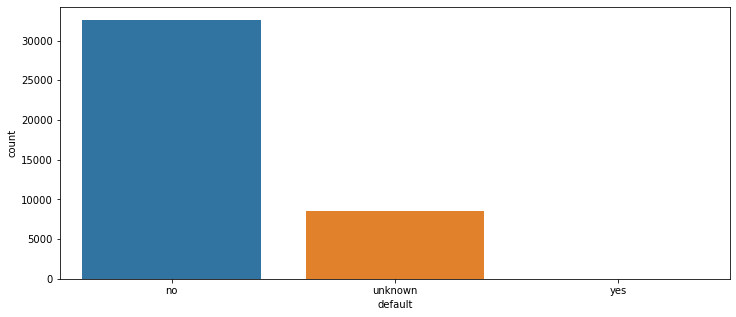

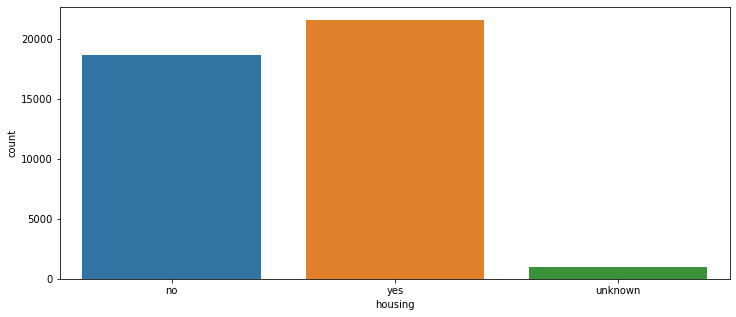

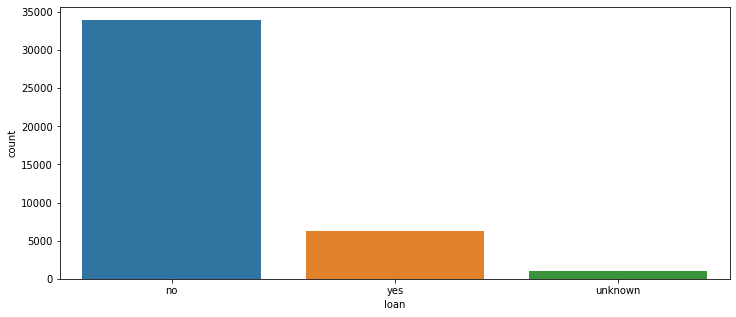

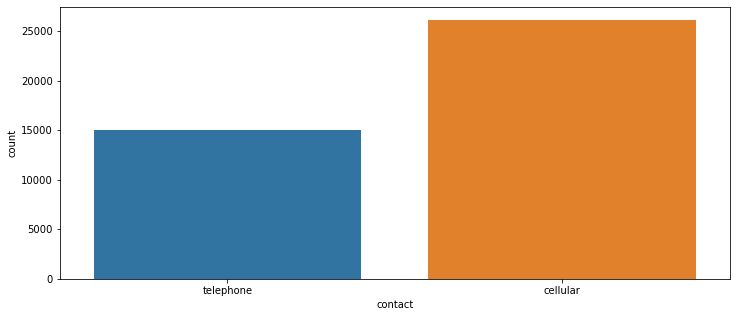

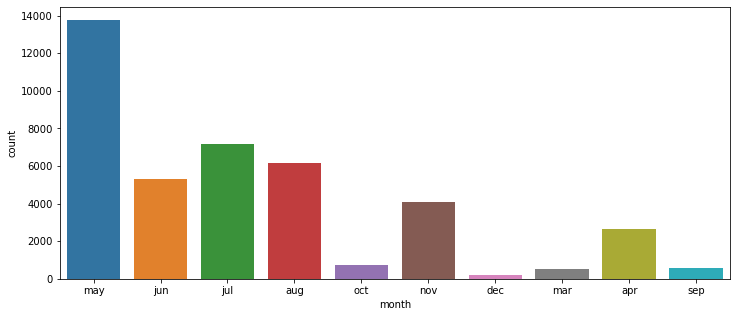

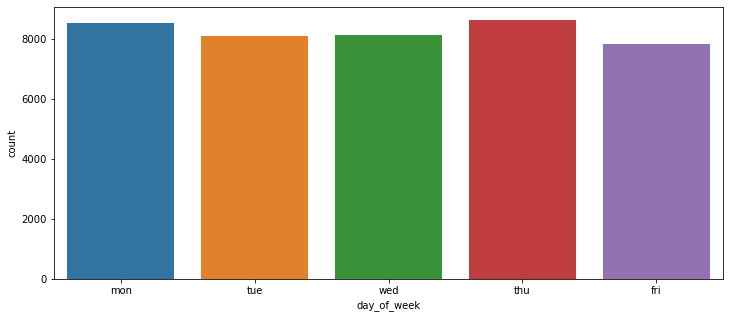

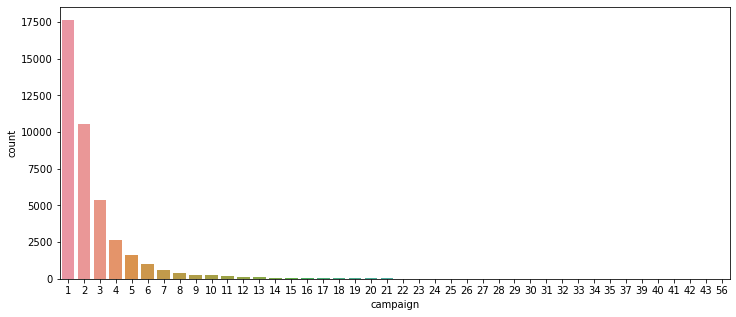

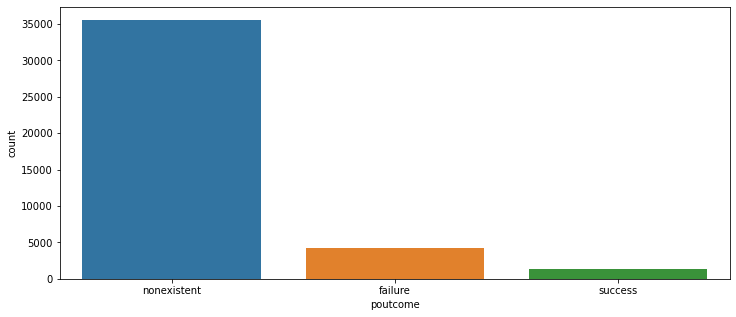

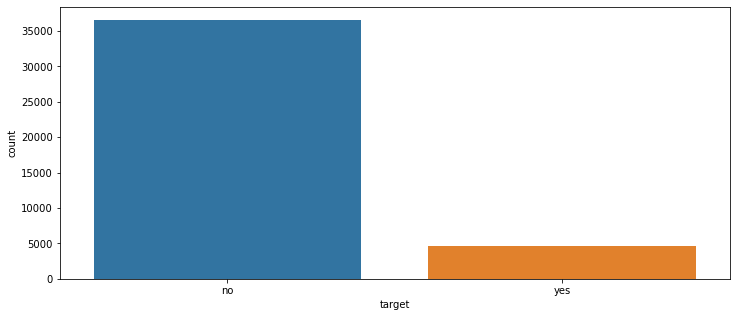

In [476]:
li_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "campaign", "poutcome", "target"]
for i in li_cat:
    plt.figure(figsize=(12,5))
    sns.countplot(i,data = data)

### Visualizing Numerical Variable

### --> AGE

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

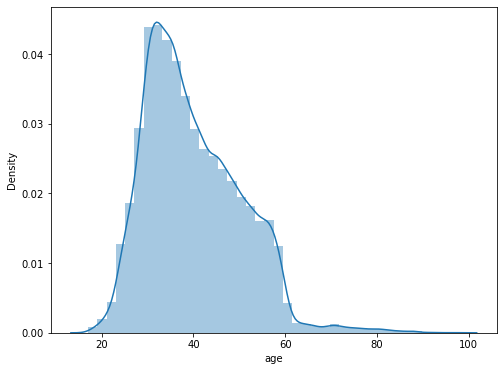

In [477]:
plt.figure(figsize=(8,6))
sns.distplot(data['age'],bins=40)

In [478]:
data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

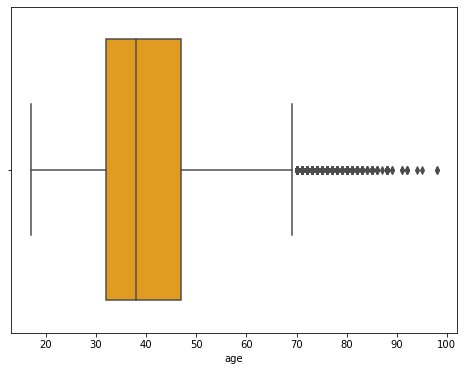

In [479]:
plt.figure(figsize = (8,6))
fig = sns.boxplot(x = 'age',data = data, color = 'orange')

### -->Duration

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

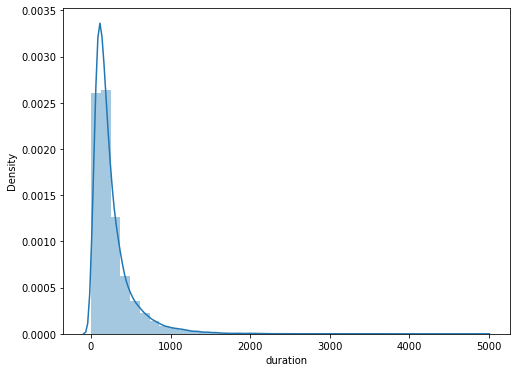

In [480]:
plt.figure(figsize = (8,6))
sns.distplot(data['duration'], bins = 40)

In [481]:
data.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

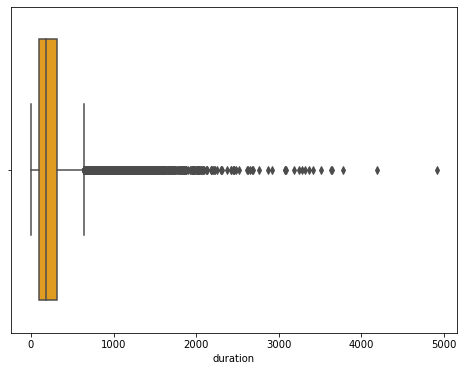

In [482]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='duration', data = data, color = 'orange')

In [483]:
#converting target variable in 0 for no and 1 for yes
data['target']=data['target'].replace({'no':0,'yes':1})

In [484]:
data.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

## Bivariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

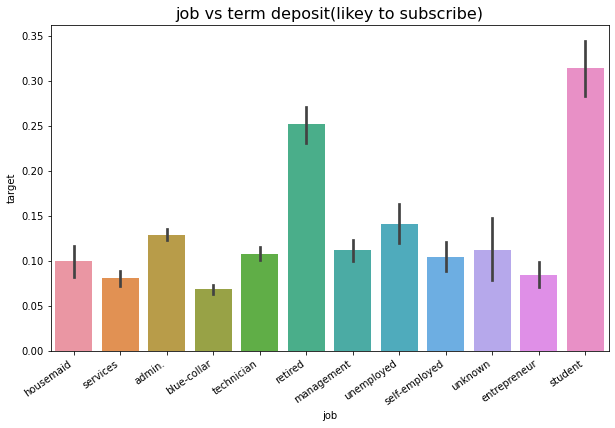

In [485]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=data)
plt.title('job vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

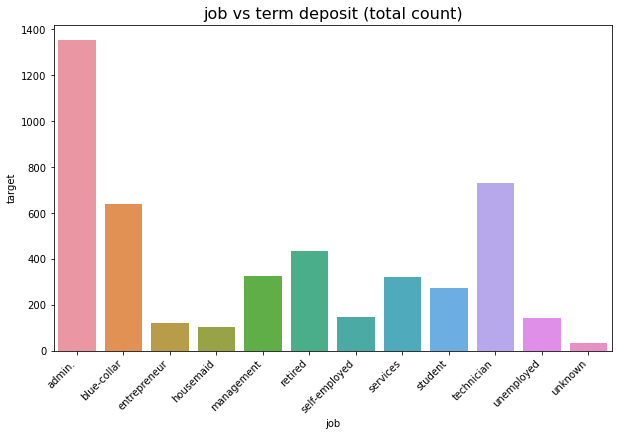

In [486]:
data1 = data.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = data1.index, y = data1.target, data = data1)
plt.title('job vs term deposit (total count)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [487]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term deposit(likely to subscribe)')

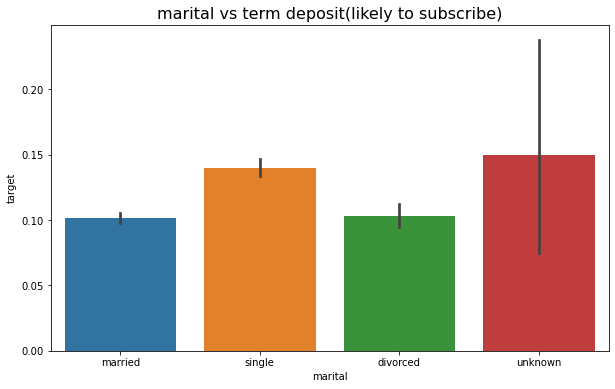

In [488]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital',y = 'target', data = data)
plt.title('marital vs term deposit(likely to subscribe)', fontsize = 16)

Text(0.5, 1.0, 'marital vs term deposit (total count)')

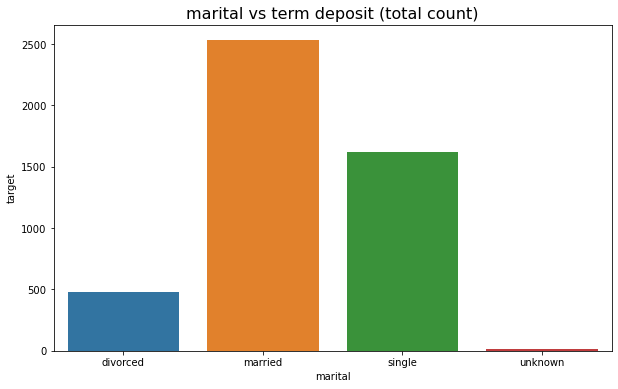

In [489]:
data1 = data.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = data1.index, y = data1.target, data = data1)
plt.title('marital vs term deposit (total count)',fontsize=16)

In [490]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0.5, 1.0, 'education vs term deposit(likey to subscribe)')

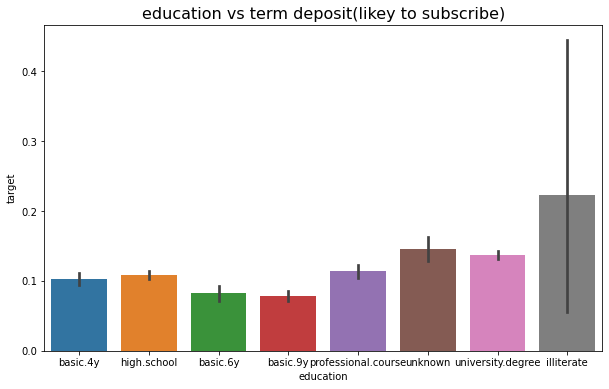

In [491]:
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=data)
plt.title('education vs term deposit(likey to subscribe)',fontsize=16)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

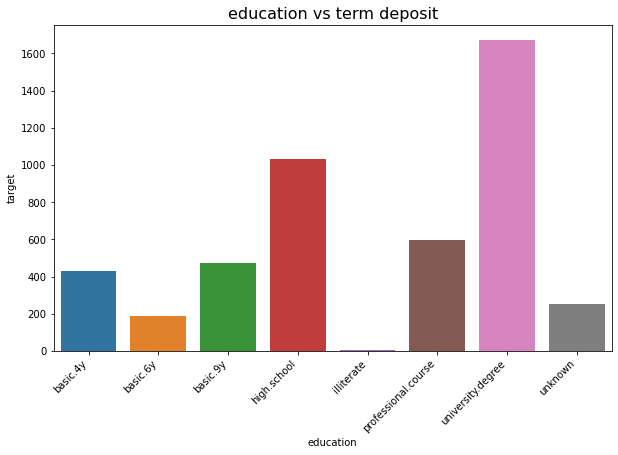

In [492]:
data1 = data.groupby('education').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = data1.index, y = data1.target, data = data1)
plt.title('education vs term deposit',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [493]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

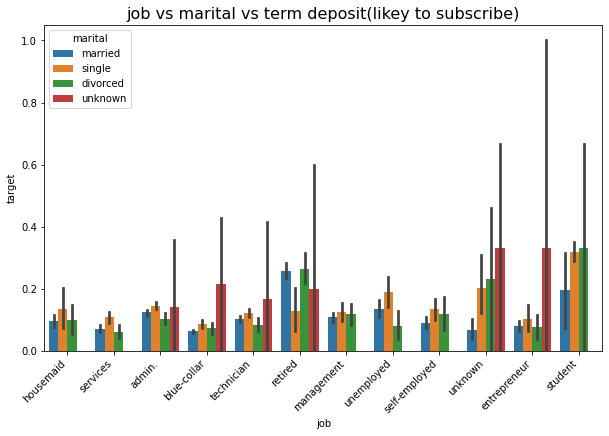

In [494]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', hue='marital',data=data)
plt.title('job vs marital vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

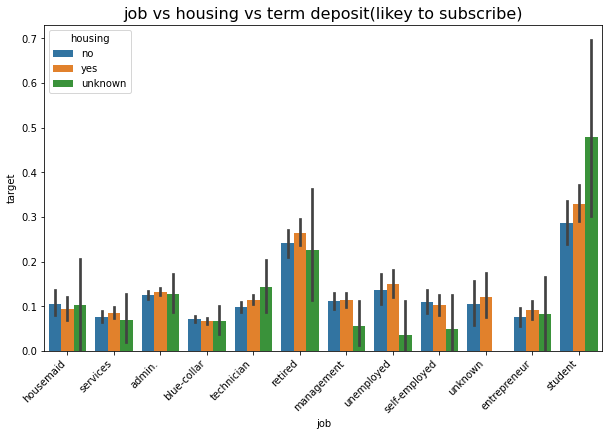

In [495]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target',hue='housing', data=data)
plt.title('job vs housing vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

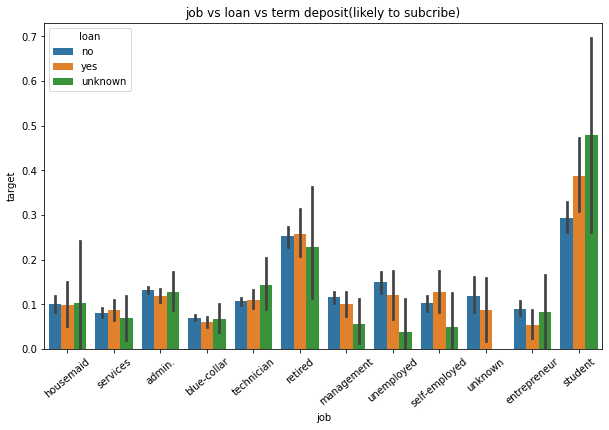

In [496]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'job', y ='target' ,hue ='loan' , data = data)
plt.title("job vs loan vs term deposit(likely to subcribe)")
plt.xticks(rotation = 40 )

# month vs term deposit

Text(0.5, 1.0, 'month vs term deposit (likely to subscribe)')

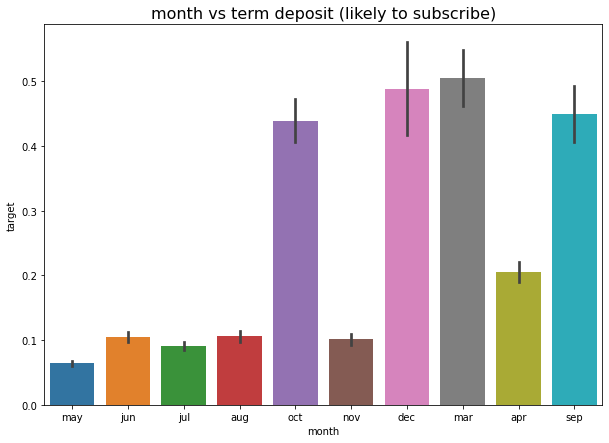

In [497]:
plt.figure(figsize = (10, 7))
sns.barplot(x = 'month', y = 'target', data = data)
plt.title("month vs term deposit (likely to subscribe)", fontsize = 16)

Text(0.5, 1.0, 'month vs term deposit (total)')

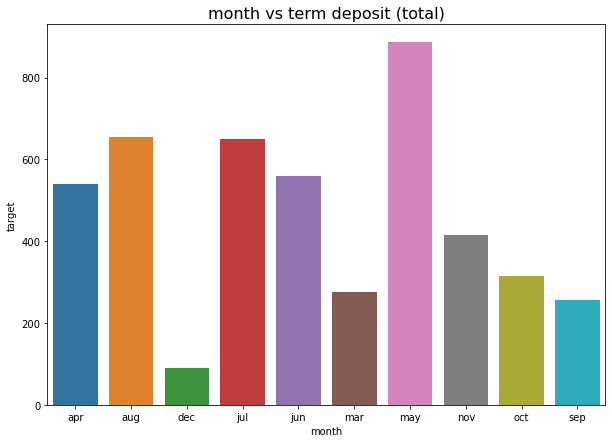

In [498]:
data1 = data.groupby('month').agg({'target':sum})
plt.figure(figsize=(10,7))
sns.barplot(x = data1.index, y = data1.target, data =data1)
plt.title('month vs term deposit (total)',fontsize=16)

In [499]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

# Day of week vs term deposit

Text(0.5, 1.0, 'day of week vs term deposit(likely to describe)')

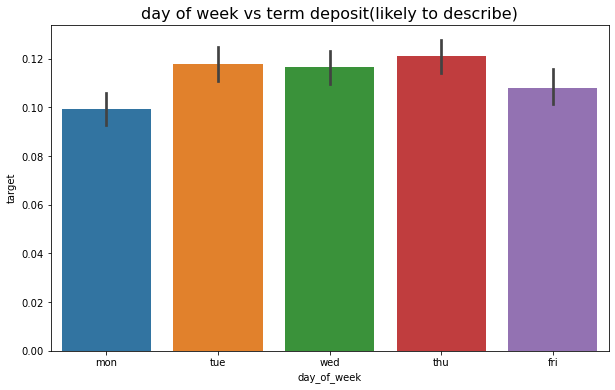

In [500]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'day_of_week', y = 'target', data = data)
plt.title("day of week vs term deposit(likely to describe)", fontsize=16)

Text(0.5, 1.0, 'day of week vs term deposit(total)')

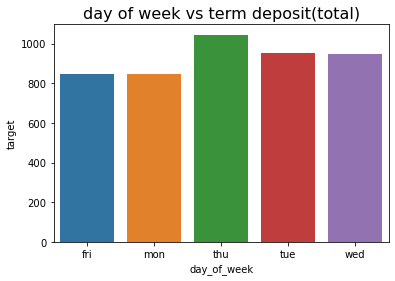

In [501]:
data1 = data.groupby('day_of_week').agg({'target':'sum'})
sns.barplot(x = data1.index, y = data1.target, data = data1)
plt.title('day of week vs term deposit(total)', fontsize = 16)

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0.5, 1.0, 'Correlation matrix for numerical variables')

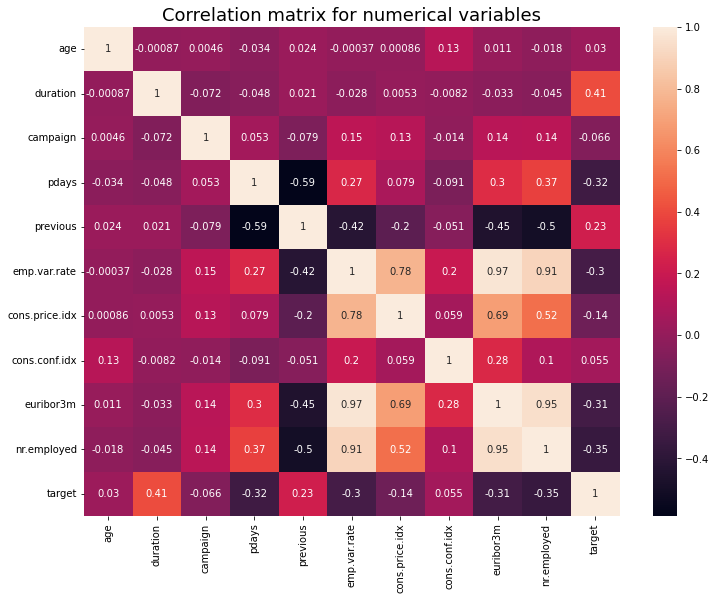

In [503]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize =(12,9))
sns.heatmap(corrmat, annot = True)
plt.title("Correlation matrix for numerical variables", fontsize = 18)

<!-- Observations -->

# Data Preparation

    Dropping the 'duration' column. 
    As the duration will be unknown before a call is performed so in training dataset we can not keep this.
    Moreover after the the call an how the outcome will be khnown 

In [504]:
data = data.drop('duration', axis = 1)

In [505]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [506]:
data.shape

(41188, 20)

In [507]:
# columns now in dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [508]:
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [509]:
# In pdays 39673 values are 999 which means client was not previously contacted, and the range for other values is
# 0-27 and count is significantly low , now we can not keep this coulmn like this ,it will add bias to our model , 
#so we will convert this column as categorical column 

In [510]:
data.pdays.unique() # it signifies that had passed by when customer was last contacted
# we thought converting to categorical variable either the customer was contacted or not not contacted.

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [511]:
data['pdays_cat'] =['cont' if each==999 else 'not_cont' for each in data.pdays]

In [512]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont


In [513]:
data.pdays_cat.value_counts()

cont        39673
not_cont     1515
Name: pdays_cat, dtype: int64

In [514]:
data = data.drop(['pdays'],axis = 1)

In [515]:
data.shape

(41188, 20)

### Seperating categorical variable

In [516]:
cat_columns_data = data.select_dtypes(include = ['object'])

In [517]:
cat_columns_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,pdays_cat
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,cont
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,cont
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,cont
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,cont
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,cont
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,cont
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,cont
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont


### Seperating numerical variable

In [518]:
num_columns_data = data.select_dtypes(exclude = ['object'])

In [519]:
num_columns_data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [520]:
num_columns_data = num_columns_data.drop('target', axis = 1)

In [521]:
num_columns_data.shape

(41188, 8)

In [522]:
num_columns_data.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Creating a test data set

In [523]:
data_test = data.target.astype(dtype = 'bool')

In [524]:
data_test.shape

(41188,)

In [525]:
data_test.dtype

dtype('bool')

### Creating dummy variables form categorical varibales 

In [526]:
dummy_columns_data=pd.get_dummies(cat_columns_data,drop_first=True)
dummy_columns_data.shape

(41188, 44)

Dummy variables - It often describes the individual variables in a one-hot encoding scheme.

### Scaling numerical variables 

In [527]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns_scaled_data = pd.DataFrame(scaler.fit_transform(num_columns_data),columns = num_columns_data.columns)

In [528]:
num_columns_scaled_data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


### Create train dataset

In [529]:
data_train = pd.concat([num_columns_scaled_data, dummy_columns_data], axis = 1, sort = False)
data_train

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_cat_not_cont
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0,...,1,0,0,0,0,0,0,1,0,0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0,...,1,0,0,0,0,0,0,1,0,0


In [530]:
data_train.shape

(41188, 52)

#### Train Test Spliting

In [531]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size = 0.2,random_state = 101)

In [532]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 52)
(8238, 52)
(32950,)
(8238,)


### Handling imbalance data

In [533]:
from collections import Counter
print(Counter(y_train))

Counter({False: 29269, True: 3681})


Yes : 88.82 %
No : 11.17 %

### We will use Random Oversampling technique to balance the data , this method randomly selectes examples from the minority class, with replacement, and adding them to the training dataset.

In [534]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [535]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [536]:
X_train_os.shape,y_train_os.shape

((58538, 52), (58538,))

In [537]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({False: 29269, True: 3681})
Counter({False: 29269, True: 29269})


### Model used 
* K-Nearest Neighbor
* Decision Tree

### Evaluation metrics :
* Accuracy Score 
* Precision Score 
* Recall Score 
* F1 - score


### Evaluation method :
* Satisfactory Recall Score : Our objective will be reducing False Negative       count,we can not miss out our potential customer 
* Satisfactory Precision Score : We have to bring False Positive count low so     that we save ourselves from wasting money and effort . 


In [538]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [539]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('precision score is :',precision )
    print('recall score is :',recall )

## Knn Classifier

In [540]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for k in range(1,25) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_os,y_train_os)
    y_pred=knn.predict(X_test)
    scores.append(metrics.recall_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

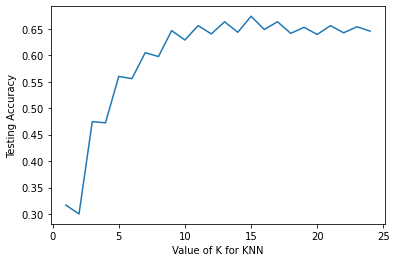

In [541]:
plt.plot(range(1,25), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [542]:
#will consider the optimun k value as 14 
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_os,y_train_os)
y_predKNN=knn.predict(X_test)

In [543]:
classification_metrics(y_test,y_predKNN)

accuracy score is : 0.7225054624908959
precision score is : 0.24092151503319015
recall score is : 0.643378519290928


## Decision Tree Classifier 

In [544]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_os,y_train_os)
y_predDT=DT.predict(X_test)

In [545]:
classification_metrics(y_test,y_predDT)

accuracy score is : 0.8394027676620539
precision score is : 0.3215686274509804
recall score is : 0.3420229405630866
